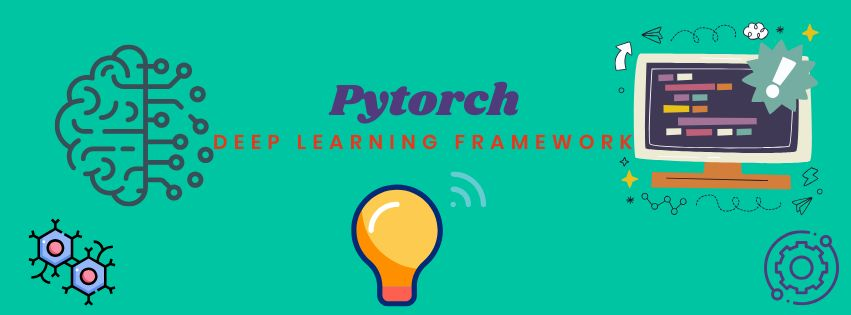


#### 🎩  Pytorch
PyTorch is an open-source machine learning library that provides a flexible and efficient framework for building and training deep neural networks. It is widely used for tasks like neural network research, computer vision, natural language processing, and more.

### 🌅 Implementation of Neural Network with Pytorch


`Neural Network`: A computational model inspired by the human brain that learns to make predictions from data through layers of interconnected artificial neurons.

`weight` : In machine learning, a weight is a parameter that determines the strength of the connection between neurons in a neural network, affecting the importance of input features in making predictions.

`bias`: Think of bias as the "base value" in a machine learning model. It's like an initial guess that the model starts with before learning from data.






#### 🚜 Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

#### 🚀 Weight and Bias for forward propagation


--**Module in PyTorch:** `A base class for all PyTorch modules that provides a foundation for building and training neural network models, including layers, networks, and more.`

--**init:** `A special method in Python classes used for initializing object attributes.`

--**self:** `A reference to the instance of the class.`

--**super:** `Calls a method from a parent class.`

--**Linear:** `It performs a linear transformation of the input data.`

In [2]:
# defining neural network with torch

class NeuralNetwork(nn.Module):
    def __init__(self,input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
        #weight and bias initialization
        nn.init.normal(self.linear.weight, mean = 0, std = 0.001)
        nn.init.constant(self.linear.bias, 0)
        
    def forward(self,x):
        return self.linear(x)

#create instance for neural network
input_size = 10
output_size = 5
    
layer = NeuralNetwork(input_size, output_size)
print("Layer:", layer)
print(f'weight: {layer.linear.weight}')
print(f'bias: {layer.linear.bias}')


Layer: NeuralNetwork(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)
weight: Parameter containing:
tensor([[-5.2372e-04, -7.0732e-04, -3.8773e-05, -2.2032e-04, -2.5123e-04,
         -3.3183e-04, -5.4054e-04,  1.0440e-03, -1.3177e-03,  2.3700e-04],
        [ 1.0486e-03, -3.3422e-04,  4.3912e-04, -5.3758e-04, -2.2796e-03,
         -1.1581e-03, -7.9858e-04, -1.0560e-03,  1.4683e-03,  4.4727e-04],
        [ 5.0062e-04, -1.3911e-03, -1.7675e-04, -7.5964e-04,  9.3791e-04,
         -9.6046e-05, -8.5835e-04,  4.4507e-04,  1.0389e-03,  8.2144e-04],
        [-7.2498e-04, -2.5653e-04, -4.1172e-04,  5.7609e-04, -4.4443e-05,
          1.0510e-03, -5.2162e-04, -8.2057e-04, -5.6061e-04,  6.4773e-04],
        [ 9.0765e-05,  1.5153e-03, -4.1547e-04,  4.1315e-04,  7.2635e-05,
         -8.1117e-04, -6.1135e-05,  6.3961e-04, -1.4765e-03, -1.0909e-03]],
       requires_grad=True)
bias: Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)


/tmp/ipykernel_20/3989482657.py:9: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(self.linear.weight, mean = 0, std = 0.001)
/tmp/ipykernel_20/3989482657.py:10: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(self.linear.bias, 0)



📌 **note:** The output will show the layer object, the initialized weight tensor, and the bias tensor, which would include the information about the layer's parameters and their initial values.

### 💦 Feedforward and Backward Propagation 

**Dataset Details**

> The dataset consists of two PyTorch tensors:

x_train contains a set of feature vectors with shape **(10, 3)**. Each row represents a feature vector with three values.
y_train contains corresponding target values with shape **(10, 1)**. Each row represents a single target value.
The dataset appears to be structured for a regression task, where the goal is to predict a continuous numerical target (y_train) based on the input features (x_train).



* **Feedforward Propagation:** Passing input data through the network to generate predictions.

* **Backward Propagation:** Adjusting the model's parameters (weights and biases) to minimize the prediction error based on the calculated gradients.

* **nn.Linear:** module in PyTorch represents a fully connected (dense) layer in a neural network. It performs a linear transformation on the input data. 
* **ReLU():** it's a non-linear activation function to introduce non-linearity in neural network. Therefore it can retrive more complex pattern from inputs. 
* **MSELoss():** stands for Mean Squared Error Loss, and it measures the average squared difference between predicted and actual values, commonly used for regression tasks in neural networks for loss calculation.
* **optim.SGD():** is an optimizer in PyTorch that stands for Stochastic Gradient Descent. It's a fundamental optimization algorithm used to minimize the loss function during neural network training by iteratively adjusting model parameters. The purpose of an optimizer in the context of training neural networks is to adjust the model's parameters (weights and biases) in order to minimize a defined loss or cost function. 
* **parameters():** a method to retrieve all the learnable parameters (weights and biases) of a neural network model.
* **torch.tensor:** function in PyTorch to create tensor with the specified data.Neural network works on tensor inputs. It's a multi-dimensional array with complex structure.
* **loss.backward():** computes the gradients of the loss with respect to the model's parameters, which are essential for updating the parameters during optimization.
* **optimizer.step()** is the step in the training process where the optimizer updates the model's parameters sing the learning rate and gradients to minimize the loss function.
* **zero_grad():** is used during training to clear gradients before performing a forward and backward pass, followed by parameter updates.
* **no_grad():** is used during testing or inference to temporarily disable gradient computation for more efficient and memory-saving predictions.

**`zero_grad()`** is for training time, and **`no_grad()`** is for testing or inference time.

In [3]:

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetworkModel, self).__init__()
        
        # Input layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        # Hidden layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Fix the input size for fc2
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define input, hidden, output size and learning rate
input_size = 3
output_size = 1  # You mentioned a single output in your example
hidden_size = 10
learning_rate = 0.01

# Create the model
model = NeuralNetworkModel(input_size, hidden_size, output_size)
print(f'model details: {model}')

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Data with tensor conversion
x_train = torch.tensor([[8.0, 9.0, 10.0], [11.0, 12.0, 13.0], [14.0, 15.0, 16],
                       [17.0, 18.0, 19.0], [21.0, 22.0, 23.0], [24.0, 25.0, 26.0],
                       [27.0, 28.0, 29.0], [31.0, 32.0, 33.0],
                       [34.0, 35.0, 36.0], [37.0, 38.0, 39.0]])
y_train = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0],
                       [13.0], [12.0], [11.0], [10.0], [9.0]])

# Training Iteration
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{(epoch + 1)}/{num_epochs}], Loss: {loss.item():.4f}')

# Test
with torch.no_grad():
    y_pred = model(x_train)
    print(f'Feed Forwarded Output {y_pred}')
    print("---Backpropagation Value---")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.grad)


model details: NeuralNetworkModel(
  (fc1): Linear(in_features=3, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)
Epoch [10/100], Loss: 69.8496
Epoch [20/100], Loss: 52.6152
Epoch [30/100], Loss: 41.1094
Epoch [40/100], Loss: 33.4280
Epoch [50/100], Loss: 28.2999
Epoch [60/100], Loss: 24.8763
Epoch [70/100], Loss: 22.5906
Epoch [80/100], Loss: 21.0648
Epoch [90/100], Loss: 20.0461
Epoch [100/100], Loss: 19.3660
Feed Forwarded Output tensor([[5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546],
        [5.8546]])
---Backpropagation Value---
fc1.weight tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
fc1.bias tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
fc2.we

📌 **note:** The provided code defines and trains a simple neural network for regression using PyTorch, optimizing with mean squared error and stochastic gradient descent, and then prints the model's predictions and parameter gradients.